In [2]:
import pandas as pd
import sqlite3

In [3]:
nba = sqlite3.connect('nba.db')

In [4]:
myquery = """
SELECT player_id, pts, plus_minus FROM player_game
"""

In [5]:
games = pd.read_sql_query(myquery, nba)

In [6]:
games

,player_id,pts,plus_minus
0,jonesty01,8,23
1,brookdi01,10,26
2,banede01,21,29
3,adamsst01,13,17
4,jacksja02,19,29
...,...,...,...
26093,gabriwe01,3,-4
26094,gabriwe01,0,0
26095,wrighmo01,0,1
26096,wrighmo01,0,0


In [51]:
import matplotlib as mpl
from matplotlib import pyplot

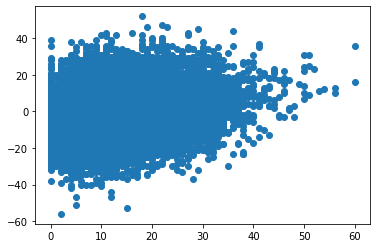

In [8]:
mpl.pyplot.scatter(x = 'pts', y = 'plus_minus', data=games)

In [9]:
def categorise(row):  
    if row['plus_minus'] > 0:
        return '1'
    elif row['plus_minus'] <= 0:
        return '0'

In [10]:
games['pos_impact'] = games.apply(lambda row: categorise(row), axis=1)


In [11]:
games

,player_id,pts,plus_minus,pos_impact
0,jonesty01,8,23,1
1,brookdi01,10,26,1
2,banede01,21,29,1
3,adamsst01,13,17,1
4,jacksja02,19,29,1
...,...,...,...,...
26093,gabriwe01,3,-4,0
26094,gabriwe01,0,0,0
26095,wrighmo01,0,1,1
26096,wrighmo01,0,0,0


<AxesSubplot:>

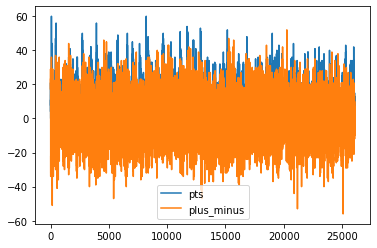

In [12]:
games.plot.line()

array([[<AxesSubplot:title={'center':'pts'}>,
        <AxesSubplot:title={'center':'plus_minus'}>]], dtype=object)

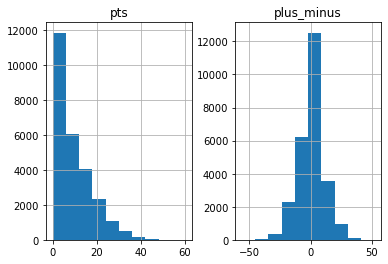

In [13]:
games.hist(bins=10)

<BarContainer object of 26098 artists>

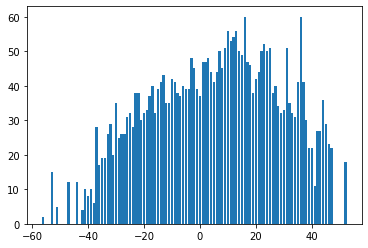

In [14]:
mpl.pyplot.bar(x = 'plus_minus',height = 'pts',data=games)

In [20]:
myquery = """
SELECT player_id, pts, starter, plus_minus FROM player_game
"""

In [21]:
gamestwo= pd.read_sql_query(myquery, nba)

In [22]:
gamestwo

,player_id,pts,starter,plus_minus
0,jonesty01,8,1,23
1,brookdi01,10,1,26
2,banede01,21,1,29
3,adamsst01,13,1,17
4,jacksja02,19,1,29
...,...,...,...,...
26093,gabriwe01,3,0,-4
26094,gabriwe01,0,0,0
26095,wrighmo01,0,0,1
26096,wrighmo01,0,0,0


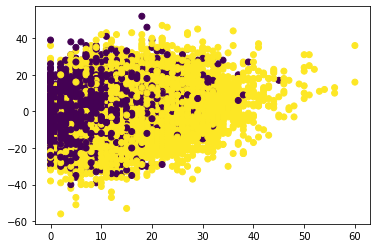

In [30]:
mpl.pyplot.scatter(x = 'pts', y = 'plus_minus', c='starter', data=gamestwo)

Text(0, 0.5, 'Points')

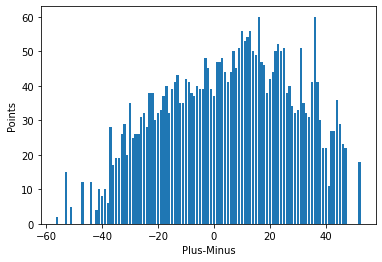

In [35]:
mpl.pyplot.bar(x = 'plus_minus', height = 'pts', data=gamestwo)
pyplot.xlabel("Plus-Minus")
pyplot.ylabel('Points')

Text(0, 0.5, 'Points')

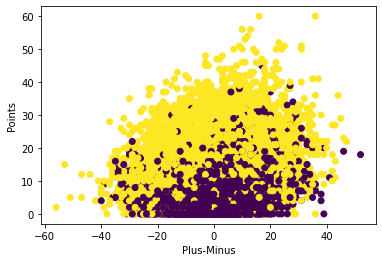

In [42]:
mpl.pyplot.scatter(x = 'plus_minus', y = 'pts', c='starter',data=gamestwo)
pyplot.xlabel("Plus-Minus")
pyplot.ylabel('Points')

In [45]:
df_norm

,player_id,plus_minus,pts,starter
0,NaN,2.213301,-0.070069,1.246419
1,NaN,2.501993,0.160372,1.246419
2,NaN,2.790685,1.427799,1.246419
3,NaN,1.635916,0.506034,1.246419
4,NaN,2.790685,1.197357,1.246419
...,...,...,...,...
26093,NaN,-0.384930,-0.646172,-0.802268
26094,NaN,-0.000007,-0.991834,-0.802268
26095,NaN,0.096223,-0.991834,-0.802268
26096,NaN,-0.000007,-0.991834,-0.802268


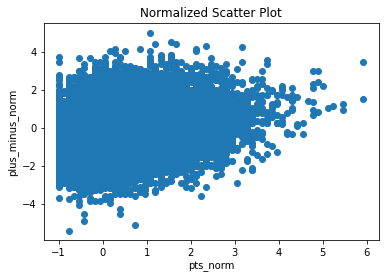

In [53]:

# select the two columns to normalize
col1 = gamestwo['pts']
col2 = gamestwo['plus_minus']

# normalize the two columns
col1_norm = (col1 - col1.mean()) / col1.std()
col2_norm = (col2 - col2.mean()) / col2.std()

# add the normalized columns to the data frame
gamestwo['pts_norm'] = col1_norm
gamestwo['plus_minus_norm'] = col2_norm

# scatter plot the normalized data
mpl.pyplot.scatter(gamestwo['pts_norm'], gamestwo['plus_minus_norm'])
pyplot.xlabel("pts_norm")
pyplot.ylabel("plus_minus_norm")
pyplot.title("Normalized Scatter Plot")
pyplot.show()

In [66]:
from sklearn.preprocessing import StandardScaler

In [62]:
gamesthree= pd.read_sql_query(myquery, nba)

In [68]:
my_df = gamesthree

col_names = ['pts']
features = my_df[col_names]

scaler = StandardScaler().fit(features.values)
gamesthree['pts_scaled'] = scaler.transform(features.values)

In [69]:
gamesthree

,player_id,pts,starter,plus_minus,pts_scaled
0,jonesty01,8,1,23,-0.070071
1,brookdi01,10,1,26,0.160375
2,banede01,21,1,29,1.427826
3,adamsst01,13,1,17,0.506043
4,jacksja02,19,1,29,1.197380
...,...,...,...,...,...
26093,gabriwe01,3,0,-4,-0.646185
26094,gabriwe01,0,0,0,-0.991853
26095,wrighmo01,0,0,1,-0.991853
26096,wrighmo01,0,0,0,-0.991853


Text(0, 0.5, 'Points Scaled')

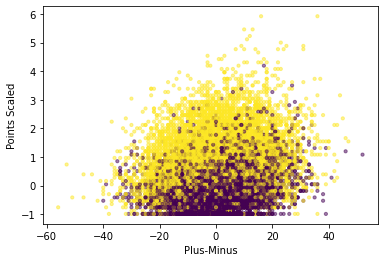

In [72]:
mpl.pyplot.scatter(x = 'plus_minus', y = 'pts_scaled', c='starter',data=gamesthree, s=10, alpha=0.5)
pyplot.xlabel("Plus-Minus")
pyplot.ylabel('Points Scaled')

In [ ]:
mpl.pyplot.scatter(x = 'pts', y = 'plus_minus', c='starter', data=gamestwo)